In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns           # Optional, only helps in making better visualisations

In [2]:
def sigmoid(x):      # Sigmoid is a function from Reals -> [0,1]
    return 1/(1+ np.exp(-x))

### Cost/Loss function used = Log-loss function (binary case)
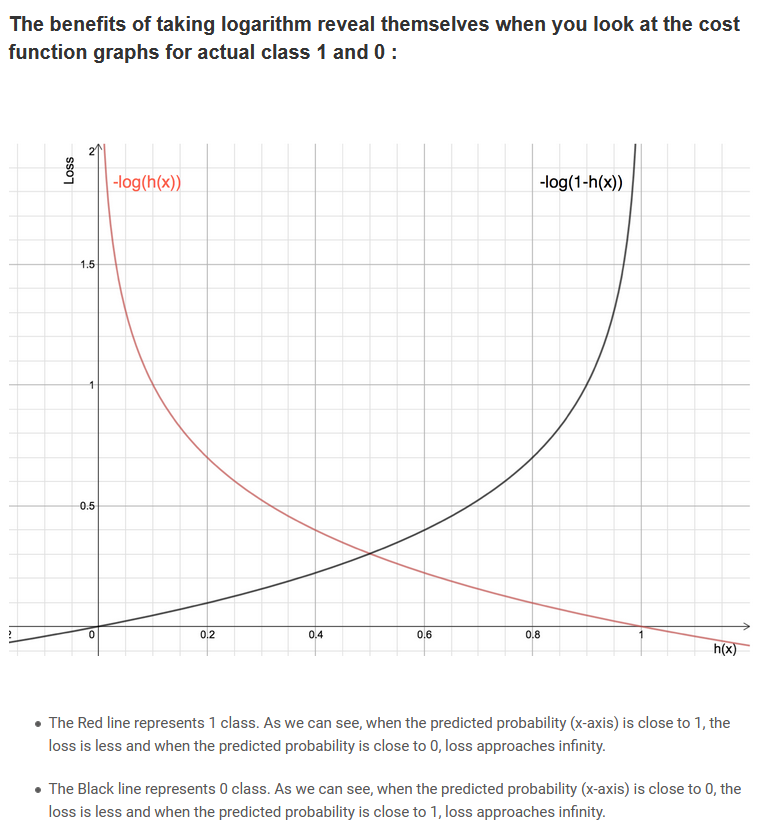

In [3]:
def compute_cost(X, y, theta): # X = features, y = target, theta = parameters
    m = len(y)
    
    #print("X.shape = ", X.shape, "\ntheta.shape = ", theta.shape)
        
    h = sigmoid((X @ theta).reshape(-1))  # This is our predicted value (for a particular set of inputs X, given the parameter theta)
    epsilon = 1e-5

    #print('h.shape = ', h.shape)
    #print("(y.T).shape = ", (y.T).shape)
    
    
    cost = (1/m)*(((-y).T @ np.log(h + epsilon)) - ((1-y).T @ np.log(1-h + epsilon))) 
    # Epsilon is used, so that np.log(0) doesn't occur (which will be -inf)
    
    return cost

# This cost function is guranteed to give us one local minimum during the optimization

### We'll minimize the cost through gradient descent and hence obtain the optimum parameters

In [4]:
def classify(y, limit = 0.5): #The default value for the classification is 0.5, however, we can pass in any value
    
    n = len(y)
    class_pred = np.zeros(n)
    
    for i in range(n):
        class_pred[i] = 1 if y[i] > limit else 0
    
    return class_pred

In [5]:
def predict(X, params, limit = 0.5):
    
    #print("In 'predict' func., X.shape = ", X.shape, "\nparams.shape = ", params.shape)
    
    h = X @ params
    
    #if(isinstance(h, pd.Series)):
    #    pred_val = sigmoid(h)      # Have to do this, since, Series objects can't be reshaped
    #else:
    pred_val = sigmoid((h))
    
    return classify(pred_val, limit)

In [6]:
def compute_accuracy(X, y, params, limit = 0.5):

    #y_pred = predict(X, params, limit)    # limit (the 3rd parameter) is the value, over which the classification changes
                                              # i.e. Greater than limit => 1, less than that => 0
    y_pred = classify(sigmoid(X @ params), limit)
    
# Limit itself can be tuned like a hyperparameter!

# We'll keep the scoring metric as the "Accuracy" of the model
    
    #print('y_pred.shape = ', y_pred.shape)
    #print('y.shape = ', y.shape)
    
    count = [1 if y_pred[i]== y[i] else 0 for i in range(len(y))] 
# A pythonic way of using list generators to generate a list of the predictions that we got correct
    
    score = sum(count)/float(len(y))  
# The typecasting has been done so that no issues take place in division like rounding off or something

    return score

In [7]:
def gradient_descent(X, y, params, learning_rate, n_iterations, limit = 0.5):
    m = len(y)
    cost_history = np.zeros((n_iterations, 1)) #To keep the history of the descent of the cost; can be visualised using matplotlib
    accuracy = np.zeros((n_iterations, 1))
    step_size = 100  # For simpliying the output
    
    for i in range(n_iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
        #accuracy[i] = compute_accuracy(X, y, params)
        
        if i%step_size == 0:
            print('Cost function after epoch', i+1, 'is: ', cost_history[i], '& accuracy =', compute_accuracy(X, y, params, limit))
            #print('Accuracy = ', compute_accuracy(X, y, params, limit))
    return (cost_history, params)

## This concludes the Logistic Regression model

### Now, we test it out!

Let's try it with a dataset that we make ourselves (from `make_classification` in scikit-learn)

In [8]:
from sklearn.datasets import make_classification

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

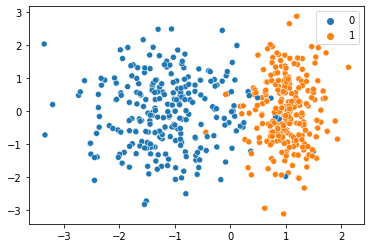

In [9]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis] # To make it a column vector. 1-D numpy arrays are arrays, not row/column vectors, hence, we need to do this.

# We plot it out using seaborn to visualise the dataset
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1))

In [10]:
m = len(y)

X = np.hstack((np.ones((m,1)),X)) 
n = np.size(X,1)                    # n = No. of columns in X_train
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.02

In [11]:
X

array([[ 1.        ,  0.94362459, -0.67978299],
       [ 1.        , -0.86801821, -0.2539218 ],
       [ 1.        , -1.76747111, -0.99992369],
       ...,
       [ 1.        ,  0.97582221, -0.99135789],
       [ 1.        ,  0.96005163,  0.58374514],
       [ 1.        , -1.52281126,  0.33935343]])

In [12]:
params.shape

(3, 1)

Initial Cost is: [0.69312718] 

Cost function after epoch 1 is:  [0.68747581] & accuracy = 0.95
Cost function after epoch 101 is:  [0.38794028] & accuracy = 0.948
Cost function after epoch 201 is:  [0.29019998] & accuracy = 0.948
Cost function after epoch 301 is:  [0.24386969] & accuracy = 0.95
Cost function after epoch 401 is:  [0.21702196] & accuracy = 0.952
Cost function after epoch 501 is:  [0.19950137] & accuracy = 0.954
Cost function after epoch 601 is:  [0.18714322] & accuracy = 0.954
Cost function after epoch 701 is:  [0.17793771] & accuracy = 0.956
Cost function after epoch 801 is:  [0.17079918] & accuracy = 0.958
Cost function after epoch 901 is:  [0.16509056] & accuracy = 0.958
Cost function after epoch 1001 is:  [0.16041354] & accuracy = 0.96
Cost function after epoch 1101 is:  [0.15650625] & accuracy = 0.962
Cost function after epoch 1201 is:  [0.15318936] & accuracy = 0.962
Cost function after epoch 1301 is:  [0.15033588] & accuracy = 0.964
Cost function after epoch 1401 

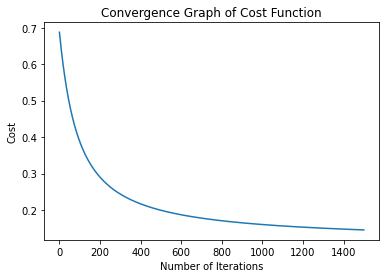

In [13]:
initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations, limit = 0.5)

print("\n")
print("Optimal Parameters are: \n", params_optimal, "\n")

plt.plot(range(len(cost_history)), cost_history)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

## The downward slope is a very good indicator that the Cost/loss function is indeed minimised over iterations.

In [14]:
print("The final cost now is: ", cost_history[-1])

The final cost now is:  [0.14569293]


### As can be observed, the cost has indeed decreased from 0.69 to 0.14 over these iterations.

## The parameters that we have obtained now are the optimised parameters for this dataset.

### Let's check how well Logistic regression performs on our dataset

In [15]:
score = compute_accuracy(X, y, params_optimal, limit = 0.5)
print(score)

0.966


### In our case, we obtain an accuracy of 96.6% by using our Logistic Regression model on our own dataset (no train-test split here)! Again, a proof that the model works perfectly well!!

### Now, to plot our dataset with the decision boundary

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


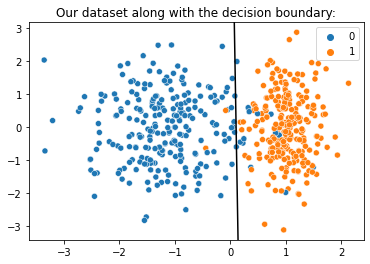

In [16]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1))

ax = plt.gca()   # Get current axes (where the graph is plotted)
ax.autoscale(False)

x_vals = np.array(ax.get_xlim()) 
y_vals = (slope * x_vals) + intercept  # Simple: y = mx + c

plt.title("Our dataset along with the decision boundary:")
plt.plot(x_vals, y_vals, c="k");

-------------------------------------------------------------------------------------------------------------------------------
# P-Club task now:

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv("D:\Downloads\diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df['Pregnancies'].value_counts() 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1) # Setting a random state for reproducability
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,136,74,26,135,26.0,0.647,51
1,1,151,60,0,0,26.1,0.179,22
2,6,109,60,27,0,25.0,0.206,27
3,3,61,82,28,0,34.4,0.243,46
4,1,116,78,29,180,36.1,0.496,25


In [23]:
m = len(y_train)

X_train2 = np.hstack((np.ones((m,1)),X_train))
n = np.size(X_train2,1)  # n = No. of columns in X_train
params = np.zeros((n,1))

print(n)
X_train2

9


array([[  1.   ,   9.   , 145.   , ...,  37.9  ,   0.637,  40.   ],
       [  1.   ,  10.   , 129.   , ...,  41.2  ,   0.441,  38.   ],
       [  1.   ,   7.   , 102.   , ...,  37.2  ,   0.204,  45.   ],
       ...,
       [  1.   ,  13.   , 126.   , ...,  43.4  ,   0.583,  42.   ],
       [  1.   ,   4.   , 171.   , ...,  43.6  ,   0.479,  26.   ],
       [  1.   ,   9.   , 102.   , ...,  32.9  ,   0.665,  46.   ]])

In [24]:
iterations = 1500
learning_rate = 0.02

initial_cost = compute_cost(X_train2, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

Initial Cost is: 0.6931271807599426 



In [25]:
sigmoid((X_train2 @ params).reshape(-1)) - y_train

0     -0.5
1     -0.5
2      0.5
3      0.5
4      0.5
      ... 
609    0.5
610   -0.5
611   -0.5
612   -0.5
613   -0.5
Name: Outcome, Length: 614, dtype: float64

In [26]:
y_train

0      1
1      1
2      0
3      0
4      0
      ..
609    0
610    1
611    1
612    1
613    1
Name: Outcome, Length: 614, dtype: int64

In [27]:
params = params.reshape(-1)
params

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

Cost function after epoch 1 is:  [3.99389107] & accuracy = 0.6530944625407166
Cost function after epoch 101 is:  [3.96072094] & accuracy = 0.6547231270358306
Cost function after epoch 201 is:  [3.93778166] & accuracy = 0.6547231270358306


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Cost function after epoch 301 is:  [3.92236495] & accuracy = 0.6563517915309446
Cost function after epoch 401 is:  [3.90451676] & accuracy = 0.6579804560260586
Cost function after epoch 501 is:  [3.89861865] & accuracy = 0.6579804560260586
Cost function after epoch 601 is:  [3.89343332] & accuracy = 0.6596091205211726
Cost function after epoch 701 is:  [3.88809824] & accuracy = 0.6596091205211726
Cost function after epoch 801 is:  [3.88449281] & accuracy = 0.6596091205211726
Cost function after epoch 901 is:  [3.88273062] & accuracy = 0.6596091205211726
Cost function after epoch 1001 is:  [3.88226962] & accuracy = 0.6579804560260586
Cost function after epoch 1101 is:  [3.88148152] & accuracy = 0.6579804560260586
Cost function after epoch 1201 is:  [3.88024601] & accuracy = 0.6579804560260586
Cost function after epoch 1301 is:  [3.88007286] & accuracy = 0.6579804560260586
Cost function after epoch 1401 is:  [3.88144329] & accuracy = 0.6596091205211726


Optimal Parameters are: 
 [-1.081

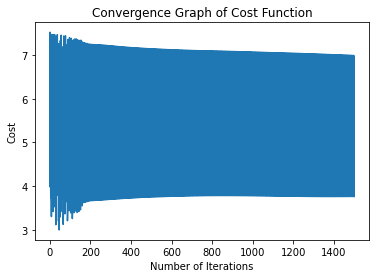

In [28]:
(cost_history, params_optimal) = gradient_descent(X_train2, y_train, params, learning_rate, iterations, limit = 0.5)

print("\n")
print("Optimal Parameters are: \n", params_optimal, "\n")

plt.plot(range(len(cost_history)), cost_history)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [29]:
X_test = pd.concat([pd.Series(1, index = X_test.index, name = '00'), X_test], axis=1) # Adding a column of all ones for the bias term in the parameters
y_test = pd.concat([pd.Series(1, index = y_test.index, name = '00'), y_test], axis=1)
X_test

,00,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,7,136,74,26,135,26.0,0.647,51
1,1,1,151,60,0,0,26.1,0.179,22
2,1,6,109,60,27,0,25.0,0.206,27
3,1,3,61,82,28,0,34.4,0.243,46
4,1,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...,...
149,1,6,99,60,19,54,26.9,0.497,32
150,1,3,115,66,39,140,38.1,0.150,28
151,1,8,188,78,0,0,47.9,0.137,43
152,1,5,136,82,0,0,0.0,0.640,69


In [30]:
y_pred = classify(sigmoid(X_test @ params_optimal))
y_pred

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1.])

In [31]:
y_test.drop(columns = '00', inplace = True)

In [32]:
y_test_array = np.array(y_test).reshape(-1)
y_test_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [33]:
count = [1 if y_pred[i]== y_test_array[i] else 0 for i in range(len(y_test_array))] 

In [34]:
score = sum(count)/float(len(y_test_array))

print("Accuracy = ", score)

Accuracy =  0.5974025974025974


# Hence, the accuracy that we obtain is 59.7% on the test dataset given by PClub!!